In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df_orig_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 1\data\ACME-HappinessSurvey2020.csv')

In [3]:
df_orig_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
df_orig_data.shape

(126, 7)

In [5]:
df_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [219]:
from dataprep.datasets import load_dataset   # Used to import / load dataset
from dataprep.eda import create_report   # Used to load Report formate
import numpy as np     # Importing Python Library


In [299]:
#  Generate Detailed EDA report with sigle line of code 
# create_report(df_orig_data[['Y','X1','X2','X3','X4','X5','X6']])

In [6]:
df_orig_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Value'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [8]:
calculate_vif(df_orig_data[['X1','X2','X3','X4','X5','X6']])

,features,VIF_Value
0,X1,35.247226
1,X2,6.184639
2,X3,14.664274
3,X4,19.882237
4,X5,15.813355
5,X6,31.895668


In [37]:
df_corrs = df_orig_data.drop(columns=['Y']).corr()

In [41]:
upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))
upper

C:\Users\dgarb\AppData\Local\Temp/ipykernel_6680/3513781305.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))


,X1,X2,X3,X4,X5,X6
X1,NaN,0.059797,0.283358,0.087541,0.432772,0.411873
X2,NaN,NaN,0.184129,0.114838,0.039996,-0.062205
X3,NaN,NaN,NaN,0.302618,0.358397,0.203750
X4,NaN,NaN,NaN,NaN,0.293115,0.215888
X5,NaN,NaN,NaN,NaN,NaN,0.320195
X6,NaN,NaN,NaN,NaN,NaN,NaN


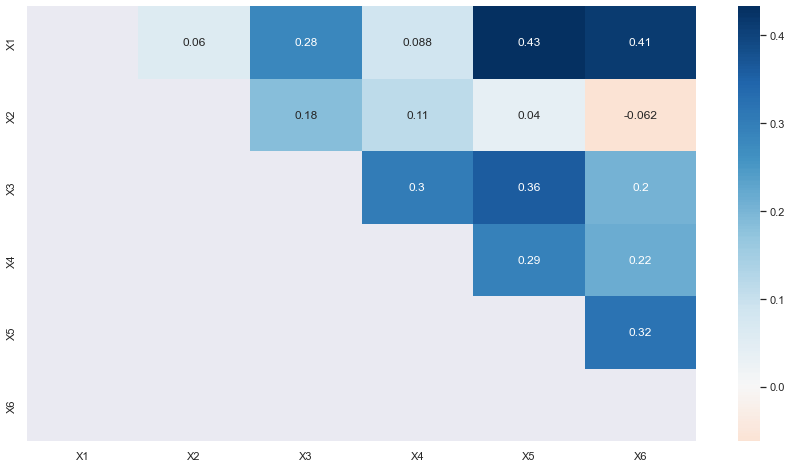

In [44]:
sns.set(font_scale=15)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(upper,cmap='RdBu',center=0,annot=True);#cmap='Blues' center=0 vmin=-1,vmax=1 cmap='RdBu'

### create DataFrames for graphs

In [73]:

df_orig_data['ones'] = pd.Series([1 for x in range(len(df_orig_data.index))])

obs = sum(df_orig_data['ones'])



In [177]:
# df_x1 = df_orig_data[['X1','Y','ones']].groupby(['X1','Y']).sum('ones').reset_index()

# summed_df = df_x1[['X1','ones']].groupby(['X1']).sum('ones').reset_index()

# summed_df.columns = ['X1','sum_ones']

# new_df = df_x1.merge(summed_df) 

# new_df['percent'] = round(new_df['ones']/new_df['sum_ones']*100,2)
# new_df

In [193]:
def new_df(feature):
    df = df_orig_data[[feature,'Y','ones']].groupby([feature,'Y']).sum('ones').reset_index()

    summed_df = df[[feature,'ones']].groupby([feature]).sum('ones').reset_index()

    summed_df.columns = [feature,'sum_ones']

    new_df = df.merge(summed_df) 

    new_df['percent'] = round(new_df['ones']/new_df['sum_ones']*100,2)
    return new_df
    

In [195]:
df_x1 = new_df('X1')

df_x2 = new_df('X2')

df_x3 = new_df('X3')

df_x4 = new_df('X4')

df_x5 = new_df('X5')

df_x6 = new_df('X6')

In [196]:
df_x1

,X1,Y,ones,sum_ones,percent
0,1,0,1,1,100.00
1,3,0,12,20,60.00
2,3,1,8,20,40.00
3,4,0,24,40,60.00
4,4,1,16,40,40.00
5,5,0,20,65,30.77
6,5,1,45,65,69.23


### create graphs

In [197]:
df_orig_data.shape

(126, 8)

In [198]:
def graph(feature,df,description):
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    bar = sns.barplot(x=feature, y="percent", data=df, hue='Y',  
                 palette='Blues')
    bar.set_ylim(0,100)
    bar.set_xlabel(description,fontsize=15)
    bar.set_ylabel('Percent');
    print(df[[feature,'ones']].groupby(feature).sum('ones').reset_index())



In [200]:
65/126 *100 # A bit more than half the customers fall into value 5 where roughly 70% of customers are happy

# Getting their order on time is very important to customers.  Customers in both  3 and 4 there are much more negative
# cases than positive cases.

51.587301587301596

   X1  ones
0   1     1
1   3    20
2   4    40
3   5    65


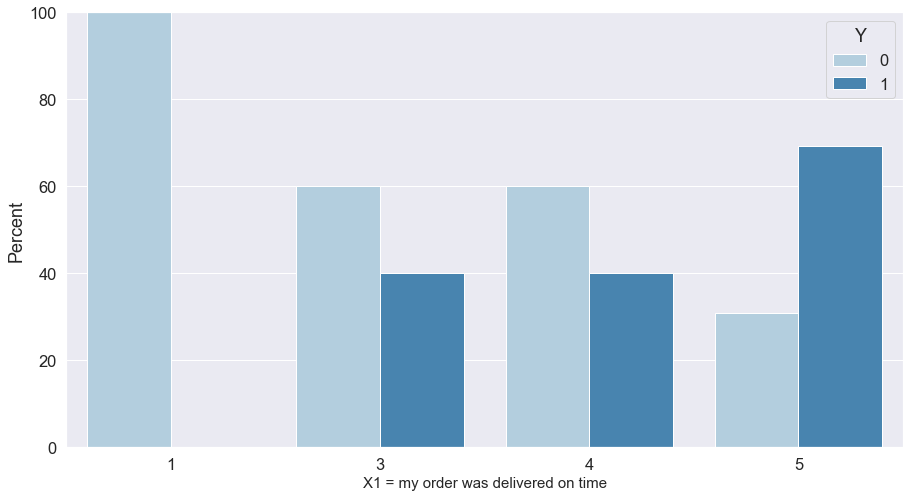

In [199]:
graph('X1',df_x1,'X1 = my order was delivered on time')

In [201]:
# For every balue except 4 customeres were happy with the contens of their orders.

   X2  ones
0   1    27
1   2    34
2   3    42
3   4    17
4   5     6


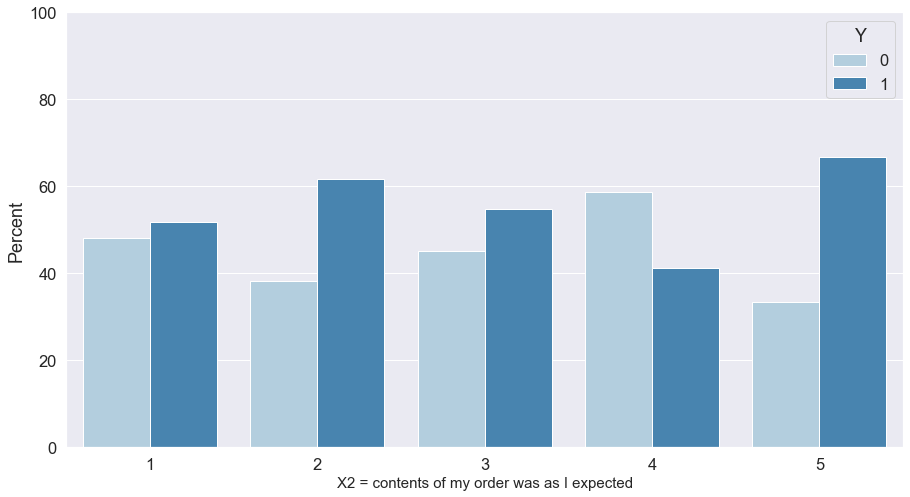

In [191]:
graph('X2',df_x2,'X2 = contents of my order was as I expected')

In [204]:
print(55/126*100)
print((55+14)/126*100)
print((33 +17)/126*100)

# The largest percent of customers are where X3 = 2 and X3 = 3.  There's not much of a difference between positive 
# cases and negative cases there.  Assuming this is a likert scale the largest number of customers are when X3 = 3 
# which means they are rather indifferent.

43.65079365079365
54.761904761904766
39.682539682539684


   X3  ones
0   1     7
1   2    14
2   3    55
3   4    33
4   5    17


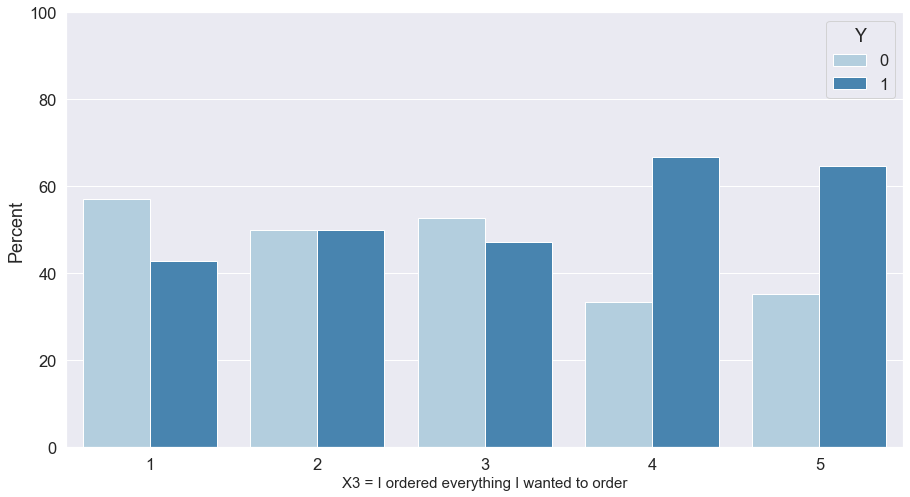

In [170]:
graph('X3',df_x3,'X3 = I ordered everything I wanted to order')

In [ ]:
# It seems the majority of customers are happy with the price that they paid. Most of them are when X4= 4 and X4 = 5.  
# where there are a high percentage of positive cases.

   X4  ones
0   1     2
1   2     5
2   3    41
3   4    53
4   5    25


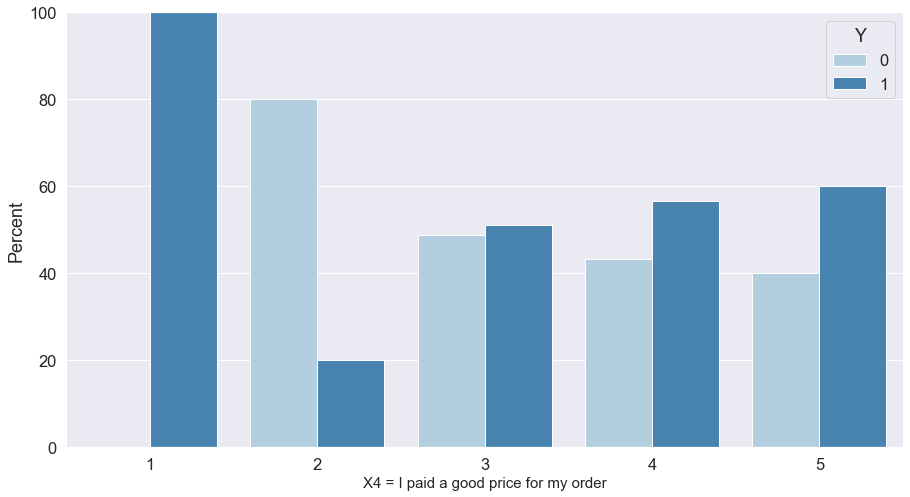

In [171]:
graph('X4',df_x4,'X4 = I paid a good price for my order')

   X5  ones
0   1     7
1   2    16
2   3    22
3   4    50
4   5    31


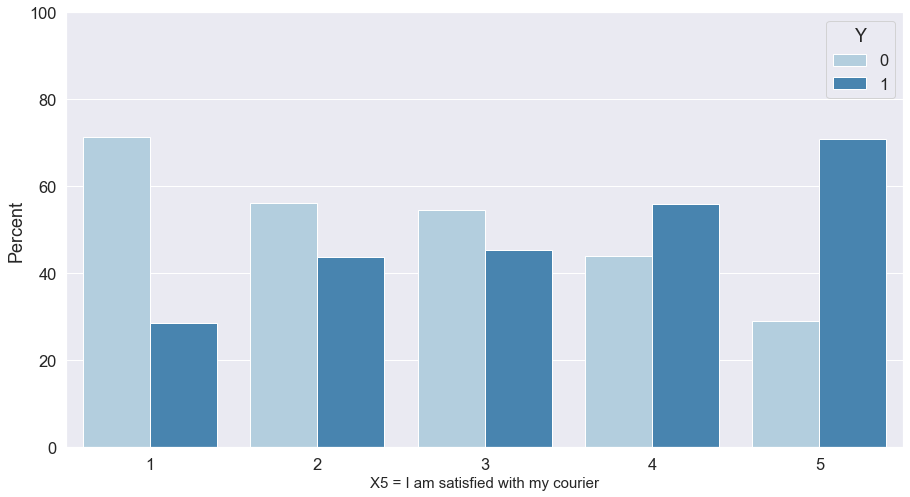

In [172]:
graph('X5',df_x5,'X5 = I am satisfied with my courier') # 81 customers are in 4 and 5 where most people are happy.

   X6  ones
0   1     1
1   2     1
2   3    20
3   4    47
4   5    57


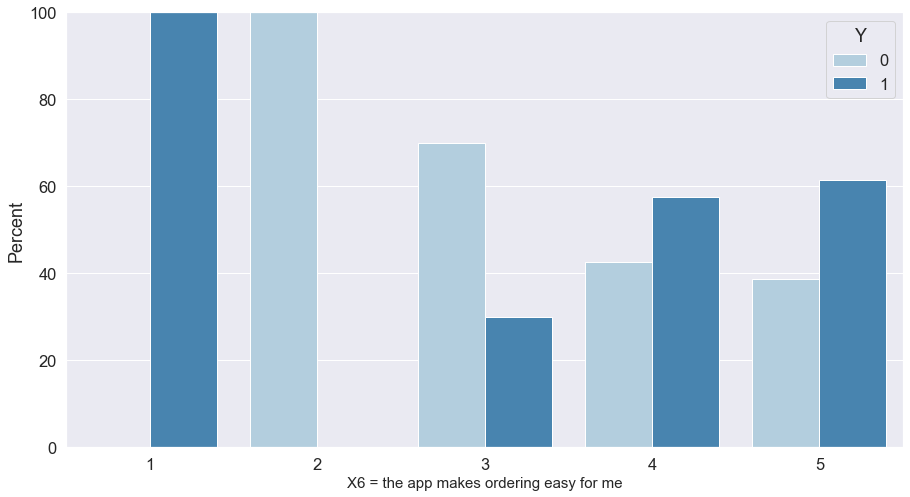

In [174]:
# The largest amount of observations is in 5 and 6 and both of those values have a much higher percent of positive cases
# than values 1,2 or 3.  Therefore this fieature probably has a strong relationship with the target. 
# Customers seem happy with the app.

graph('X6',df_x6,'X6 = the app makes ordering easy for me')

In [205]:
def categ_mean(
    df_name = None,
target_mean = None,
categ_feature = None,
target = None):

    df1 = df_name.groupby([categ_feature])[target].mean().reset_index()
    df1 = df1.rename(columns={target:'mean_of_target'})

    df1['Index'] = round(df1['mean_of_target']/target_mean*100).astype(int)

    df2= df_name[[categ_feature,target]]
    df2 = df2.groupby([categ_feature]).count().reset_index()
    df2 = df2.rename(columns={target:'category_freq'})

    df2['pct_total'] = round(df2['category_freq']/df_name.shape[0]*100,2)

    df3 = pd.merge(df2,df1)
    df3['mean_of_target'] = round(df3['mean_of_target']*100,2)
    
    print(df3)
    print(' ')

    return df3

In [208]:
# df_orig_data['Y'].mean()  0.5476190476190477

y_mean = df_orig_data['Y'].mean()

In [209]:
for feature in ['X1','X2','X3','X4','X5','X6']:
    categ_mean(df_name = df_orig_data, target_mean=y_mean, categ_feature = feature, target = 'Y')

   X1  category_freq  pct_total  mean_of_target  Index
0   1              1       0.79            0.00      0
1   3             20      15.87           40.00     73
2   4             40      31.75           40.00     73
3   5             65      51.59           69.23    126
 
   X2  category_freq  pct_total  mean_of_target  Index
0   1             27      21.43           51.85     95
1   2             34      26.98           61.76    113
2   3             42      33.33           54.76    100
3   4             17      13.49           41.18     75
4   5              6       4.76           66.67    122
 
   X3  category_freq  pct_total  mean_of_target  Index
0   1              7       5.56           42.86     78
1   2             14      11.11           50.00     91
2   3             55      43.65           47.27     86
3   4             33      26.19           66.67    122
4   5             17      13.49           64.71    118
 
   X4  category_freq  pct_total  mean_of_target  Index
0   

In [210]:
features_df = df_orig_data[['X1','X2','X3','X4','X5','X6']]

In [212]:
Y_label = df_orig_data['Y']


### create train and test for different random states 

In [214]:
from sklearn.model_selection import train_test_split

# random 0
X_train0, X_test0, y_train0, y_test0 = train_test_split(
    features_df, Y_label, test_size=0.2, stratify=Y_label, random_state=0)

In [216]:
# random 35
X_train35, X_test35, y_train35, y_test35 = train_test_split(
    features_df, Y_label, test_size=0.2, stratify=Y_label, random_state=35)

In [217]:
# random 20
X_train20, X_test20, y_train20, y_test20 = train_test_split(
    features_df, Y_label, test_size=0.2, stratify=Y_label, random_state=20)


In [218]:
# random 10
X_train10, X_test10, y_train10, y_test10 = train_test_split(
    features_df, Y_label, test_size=0.2, stratify=Y_label, random_state=10)


In [281]:
# random 40
X_train40, X_test40, y_train40, y_test40 = train_test_split(
    features_df, Y_label, test_size=0.2, stratify=Y_label, random_state=40)


In [235]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats

### classification function

In [300]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

def classx_gs2(
# includes KS satistic
#     model=  LogisticRegression(solver = 'saga', class_weight='balanced', max_iter=500),
model = None,
x_train = None,
x_test =  None,
y_train = None,
y_test =  None,
params = None,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = None,
tree_based = None):
    ###############################################################################
    
    features = list(x_train.columns)

    ss = StandardScaler()
    x_train = pd.DataFrame(ss.fit_transform(x_train), columns = features)
    x_test = pd.DataFrame(ss.fit_transform(x_test), columns = features)

    skfold = StratifiedKFold(n_splits= splits, shuffle=True, random_state=0)

    gs = GridSearchCV(model, params, cv=skfold,  return_train_score=True, refit=True, scoring=scoring)
    gs.fit(x_train,y_train)
    gs.best_params_

    class_dict = {}
    model= gs.best_estimator_
    class_dict['mod'] = model
    ###################################    

    print('best params: ',gs.best_params_)
    class_dict['best params'] = gs.best_params_

    print('score: ',gs.score(x_train,y_train))
    class_dict['score'] = gs.score(x_train,y_train)

    print('  ')
    print('test score: ',gs.score(x_test,y_test))
    class_dict['test score'] = gs.score(x_test,y_test)
    print(' ')
    from sklearn.metrics import confusion_matrix

    train_pred = gs.best_estimator_.predict(x_train)

    print('confusion matrix train')
    print(confusion_matrix(y_train, train_pred))
    
    class_dict['confusion_matrix_train'] = confusion_matrix(y_train, train_pred)
    print(' ')
    print('Train classification_report')
    print(' ')
    print(classification_report(y_train,train_pred))
    class_dict['Train classification_report'] = classification_report(y_train,train_pred)

    print(' ')
    
    
    test_pred = gs.best_estimator_.predict(x_test)
    print(' ')
    print('confusion matrix test')
    print(confusion_matrix(y_test, test_pred))
    class_dict['confusion_matrix_test'] = confusion_matrix(y_test, test_pred)
    print(' ')
    print('Test classification_report')
    class_dict['Test classification_report'] = classification_report(y_test,test_pred)
    print()
    print(classification_report(y_test,test_pred))

    print(' ')
    
    print("train roc_auc_score: ", roc_auc_score(y_train, gs.predict_proba(x_train)[:,1]))
    
    class_dict['train_roc_auc_score'] = roc_auc_score(y_train, gs.predict_proba(x_train)[:,1])
    class_dict['predicted_probabilities_1_train']  = gs.predict_proba(x_train)[:,1]
    
    print(' ')
    
    print("test_roc_auc_score: ", roc_auc_score(y_test, gs.predict_proba(x_test)[:,1]))
    
    class_dict['test_roc_auc_score'] = roc_auc_score(y_test, gs.predict_proba(x_test)[:,1])

    class_dict['predicted_probabilities_1_test'] = gs.predict_proba(x_test)[:,1]
    
    print(' ')
    #calculate KS train_______________________________________________________________________________________________
    
    predprob =list(class_dict['predicted_probabilities_1_train'])

    y = list(y_train)

    data = {'target_train':y,'predprob':predprob}

    df_prob_train= pd.DataFrame(data)
    df_prob_train.head()

    from scipy.stats import ks_2samp
    
    print('Training KS statistic')
    train_ks = ks_2samp(df_prob_train.loc[df_prob_train.target_train==0,"predprob"], df_prob_train.loc[df_prob_train.target_train==1,"predprob"])
    print(train_ks)
    class_dict['train_ks'] = train_ks
    
    print(' ')
    #calculate KS test_______________________________________________________________________________________________
    predprob2 =list(class_dict['predicted_probabilities_1_test'])

    y_ = list(y_test)

    data = {'target_test':y_,'predprob':predprob2}

    df_prob_test= pd.DataFrame(data)
    df_prob_test.head()

    
    print('Test KS statistic')
    test_ks = ks_2samp(df_prob_test.loc[df_prob_test.target_test==0,"predprob"], df_prob_test.loc[df_prob_test.target_test==1,"predprob"])
    print(test_ks)
    class_dict['test_ks'] = test_ks
    print(' ')
    #end calculate KS test_______________________________________________________________________________________________
   

    if logistic_reg == True:

        coefs = pd.Series(model.coef_[0], name = 'coef' )

        varnames = pd.Series(features, name = 'features')


        pd.set_option('display.max_rows', None) # or 1000.

        abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

        coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)

        # #return:
        model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)
        model_importances.index=(range(model_importances.shape[0]))
        model_importances
        class_dict['model_importances'] = model_importances

        print(model_importances)
        print(' ')


        print('model_importances.shape: ',model_importances.shape)

    elif tree_based == True:
        pd.set_option('display.max_rows', None) # or 1000.

        #return
        varnames = pd.Series(features, name = 'features')

        importances_ = pd.Series(model.feature_importances_, name = 'importances')

        df = pd.concat([varnames,importances_], axis=1)

        model_importances = df.sort_values(by=['importances'], ascending=False)

        model_importances.index=(range(model_importances.shape[0]))

        class_dict['model_importances'] = model_importances

        print(model_importances)



    return class_dict


In [ ]:
X_train0

In [ ]:
# X_train0, X_test0, y_train0, y_test0

In [278]:
#     model=  LogisticRegression(solver = 'saga', class_weight='balanced', max_iter=500),
model_0 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train0,
x_test =  X_test0,
y_train = y_train0,
y_test =  y_test0,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,1.5,2,2.5,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.64
  
test score:  0.5384615384615384
confusion matrix train
[[27 18]
 [18 37]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        45
           1       0.67      0.67      0.67        55

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100

 
 
confusion matrix test
[[6 6]
 [6 8]]
 
Test classification_report

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.57      0.57      0.57        14

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26

 
train roc_auc_score:  0.7042424242424242
 
test_roc_auc_score:  0.6071428571428572
 
Training KS statistic
Kste

In [264]:
# drop X4
model_0 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train0[['X1','X2','X3','X5','X6']],
x_test =  X_test0[['X1','X2','X3','X5','X6']],
y_train = y_train0,
y_test =  y_test0,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.64
  
test score:  0.5384615384615384
confusion matrix train
[[27 18]
 [18 37]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        45
           1       0.67      0.67      0.67        55

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100

 
 
confusion matrix test
[[6 6]
 [6 8]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.57      0.57      0.57        14

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26

 
train roc_auc_score:  0.7042424242424242
 
test_roc_auc_score:  0.6071428571428572
 
Training KS statistic
Kst

In [249]:
# print(calculate_vif(X_train0))
# print(calculate_vif(X_train0[['X1','X2','X3','X5','X6']]))

C:\Users\dgarb\AppData\Local\Temp/ipykernel_6680/659586563.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))


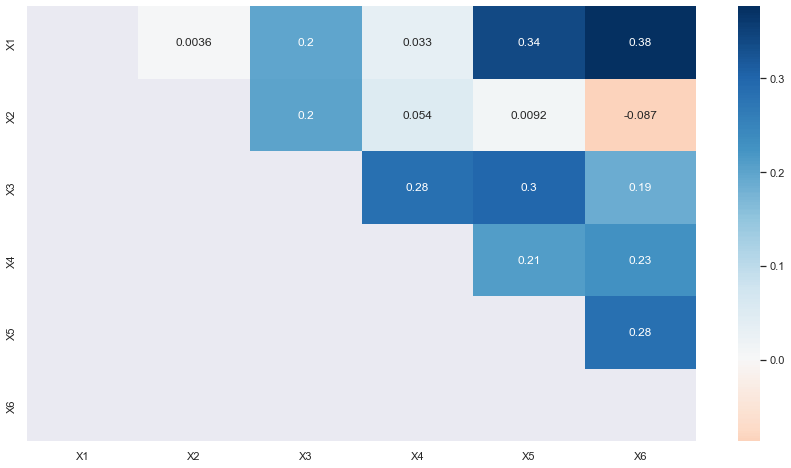

In [241]:
df_corrs = X_train0.corr()
upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))

sns.set(font_scale=15)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(upper,cmap='RdBu',center=0,annot=True);#cmap='Blues' center=0 vmin=-1,vmax=1 cmap='RdBu'

In [246]:
#     model=  LogisticRegression(solver = 'saga', class_weight='balanced', max_iter=500),
model_0 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train0[['X1','X2','X5','X6']],
x_test =  X_test0[['X1','X2','X5','X6']],
y_train = y_train0,
y_test =  y_test0,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.64
  
test score:  0.5384615384615384
confusion matrix train
[[27 18]
 [18 37]]
 
 
confusion matrix test
[[6 6]
 [6 8]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.57      0.57      0.57        14

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26

 
train roc_auc_score:  0.7012121212121212
 
test_roc_auc_score:  0.6101190476190477
 
Training KS statistic
KstestResult(statistic=0.38181818181818183, pvalue=0.000968060217642841)
 
Test KS statistic
KstestResult(statistic=0.2619047619047619, pvalue=0.6843530033030639)
 
  features     coef  abs_val
0       X1  0.48533  0.48533
1       X5  0.24783  0.24783
2       X6  0.10906  0.10906
3       X2 -0.04191  0.04191
 
model_importances.shape:  (4, 3)


In [279]:
model_0 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced'),
x_train = X_train0[['X1','X5','X6']],
x_test =  X_test0[['X1','X5','X6']],
y_train = y_train0,
y_test =  y_test0,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,1.5,2,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 0.1, 'penalty': 'l1'}
score:  0.68
  
test score:  0.5384615384615384
confusion matrix train
[[31 14]
 [18 37]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.63      0.69      0.66        45
           1       0.73      0.67      0.70        55

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100

 
 
confusion matrix test
[[6 6]
 [6 8]]
 
Test classification_report

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.57      0.57      0.57        14

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26

 
train roc_auc_score:  0.6733333333333333
 
test_roc_auc_score:  0.5744047619047619
 
Training KS statistic
Ks

In [248]:
# keep X1 only
model_0 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train0[['X1']],
x_test =  X_test0[['X1']],
y_train = y_train0,
y_test =  y_test0,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.68
  
test score:  0.5384615384615384
confusion matrix train
[[31 14]
 [18 37]]
 
 
confusion matrix test
[[6 6]
 [6 8]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.57      0.57      0.57        14

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26

 
train roc_auc_score:  0.6733333333333333
 
test_roc_auc_score:  0.5744047619047619
 
Training KS statistic
KstestResult(statistic=0.3616161616161616, pvalue=0.0021326495610594076)
 
Test KS statistic
KstestResult(statistic=0.17857142857142858, pvalue=0.9620223241558549)
 
  features    coef  abs_val
0       X1 0.59923  0.59923
 
model_importances.shape:  (1, 3)


In [265]:

model_35 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train35,
x_test =  X_test35,
y_train = y_train35,
y_test =  y_test35,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,10]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)




best params:  {'C': 1, 'penalty': 'l1'}
score:  0.62
  
test score:  0.5384615384615384
confusion matrix train
[[29 16]
 [22 33]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        45
           1       0.67      0.60      0.63        55

    accuracy                           0.62       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.63      0.62      0.62       100

 
 
confusion matrix test
[[6 6]
 [6 8]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.57      0.57      0.57        14

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26

 
train roc_auc_score:  0.6927272727272726
 
test_roc_auc_score:  0.5654761904761905
 
Training KS statistic
Kst

In [298]:
# df_corrs = X_train35.corr()
# upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))

# sns.set(font_scale=15)
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.heatmap(upper,cmap='RdBu',center=0,annot=True);#cmap='Blues' center=0 vmin=-1,vmax=1 cmap='RdBu'

In [297]:
# df_corrs = X_test35.corr()
# upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))

# sns.set(font_scale=15)
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.heatmap(upper,cmap='RdBu',center=0,annot=True);#cmap='Blues' center=0 vmin=-1,vmax=1 cmap='RdBu'

In [276]:
#    drop X2 since coeff went to zero
model_35 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced'),
x_train = X_train35[['X1','X3','X4','X5','X6']],
x_test =  X_test35[['X1','X3','X4','X5','X6']],
y_train = y_train35,
y_test =  y_test35,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,10]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.62
  
test score:  0.5384615384615384
confusion matrix train
[[29 16]
 [22 33]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        45
           1       0.67      0.60      0.63        55

    accuracy                           0.62       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.63      0.62      0.62       100

 
 
confusion matrix test
[[6 6]
 [6 8]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.57      0.57      0.57        14

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26

 
train roc_auc_score:  0.6927272727272726
 
test_roc_auc_score:  0.5654761904761905
 
Training KS statistic
Kst

In [275]:
#    drop X5,since high corr with X1
model_35 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced'),
x_train = X_train35[['X1','X3','X4','X6']],
x_test =  X_test35[['X1','X3','X4','X6']],
y_train = y_train35,
y_test =  y_test35,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,2,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 2, 'penalty': 'l1'}
score:  0.59
  
test score:  0.5
confusion matrix train
[[22 23]
 [18 37]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.55      0.49      0.52        45
           1       0.62      0.67      0.64        55

    accuracy                           0.59       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.59      0.59      0.59       100

 
 
confusion matrix test
[[5 7]
 [6 8]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.53      0.57      0.55        14

    accuracy                           0.50        26
   macro avg       0.49      0.49      0.49        26
weighted avg       0.50      0.50      0.50        26

 
train roc_auc_score:  0.6882828282828283
 
test_roc_auc_score:  0.5744047619047619
 
Training KS statistic
KstestResult(stati

In [274]:
# Lasso start without X5 and X6 since high corr with X1
lasso_35 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced'),
x_train = X_train35[['X1','X2','X3','X4']],
x_test =  X_test35[['X1','X2','X3','X4',]],
y_train = y_train35,
y_test =  y_test35,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,2,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 2, 'penalty': 'l1'}
score:  0.6
  
test score:  0.5
confusion matrix train
[[23 22]
 [18 37]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.56      0.51      0.53        45
           1       0.63      0.67      0.65        55

    accuracy                           0.60       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.60      0.60      0.60       100

 
 
confusion matrix test
[[5 7]
 [6 8]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.53      0.57      0.55        14

    accuracy                           0.50        26
   macro avg       0.49      0.49      0.49        26
weighted avg       0.50      0.50      0.50        26

 
train roc_auc_score:  0.6892929292929293
 
test_roc_auc_score:  0.5416666666666667
 
Training KS statistic
KstestResult(statis

In [272]:
# Ridge start without X5 and X6 since high corr with X1
ridge_35 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train35[['X1','X2','X3','X4']],
x_test =  X_test35[['X1','X2','X3','X4',]],
y_train = y_train35,
y_test =  y_test35,
# params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,10]}, # lasso,
params = {'penalty':['l2'],'C':[0.0001, 0.01,1,1.5,2,3,5,10]}, # ridge,
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l2'}
score:  0.59
  
test score:  0.5
confusion matrix train
[[22 23]
 [18 37]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.55      0.49      0.52        45
           1       0.62      0.67      0.64        55

    accuracy                           0.59       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.59      0.59      0.59       100

 
 
confusion matrix test
[[5 7]
 [6 8]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.53      0.57      0.55        14

    accuracy                           0.50        26
   macro avg       0.49      0.49      0.49        26
weighted avg       0.50      0.50      0.50        26

 
train roc_auc_score:  0.6884848484848485
 
test_roc_auc_score:  0.5267857142857142
 
Training KS statistic
KstestResult(stati

In [268]:
#    drop X6,since high corr with X1
model_35 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train35[['X1','X3','X4']],
x_test =  X_test35[['X1','X3','X4']],
y_train = y_train35,
y_test =  y_test35,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,1.5,2,2.5,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1.5, 'penalty': 'l1'}
score:  0.6
  
test score:  0.5
confusion matrix train
[[23 22]
 [18 37]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.56      0.51      0.53        45
           1       0.63      0.67      0.65        55

    accuracy                           0.60       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.60      0.60      0.60       100

 
 
confusion matrix test
[[5 7]
 [6 8]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.53      0.57      0.55        14

    accuracy                           0.50        26
   macro avg       0.49      0.49      0.49        26
weighted avg       0.50      0.50      0.50        26

 
train roc_auc_score:  0.6892929292929293
 
test_roc_auc_score:  0.5416666666666667
 
Training KS statistic
KstestResult(stat

In [283]:
def corr_matrix(df_X):
    df_corrs = df_X.corr()
    upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))

    sns.set(font_scale=15)
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.heatmap(upper,cmap='RdBu',center=0,annot=True);#cmap='Blues' center=0 vmin=-1,vmax=1 cmap='RdBu'

In [286]:
model_40_0 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train40,
x_test =  X_test40,
y_train = y_train40,
y_test =  y_test40,
# params = {'penalty':['l1'],'C';[]                      
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,1.5,2,2.5,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.6
  
test score:  0.6923076923076923
confusion matrix train
[[24 21]
 [19 36]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        45
           1       0.63      0.65      0.64        55

    accuracy                           0.60       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.60      0.60      0.60       100

 
 
confusion matrix test
[[ 8  4]
 [ 4 10]]
 
Test classification_report

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.71      0.71      0.71        14

    accuracy                           0.69        26
   macro avg       0.69      0.69      0.69        26
weighted avg       0.69      0.69      0.69        26

 
train roc_auc_score:  0.6789898989898989
 
test_roc_auc_score:  0.6904761904761905
 
Training KS statistic
K

In [290]:
test40= X_train40.copy()
test40['Y'] = y_train40
# for feature in ['X1','X2','X3','X4','X5','X6']:
#     categ_mean(df_name = test40, target_mean=y_mean, categ_feature = feature, target = 'Y')

In [287]:
# drop X6 since went to zero
model_40_1 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train40[['X1','X2','X3','X4','X5']],
x_test =  X_test40[['X1','X2','X3','X4','X5']],
y_train = y_train40,
y_test =  y_test40,
# params = {'penalty':['l1'],'C';[]                      
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,1.5,2,2.5,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.6
  
test score:  0.6923076923076923
confusion matrix train
[[24 21]
 [19 36]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        45
           1       0.63      0.65      0.64        55

    accuracy                           0.60       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.60      0.60      0.60       100

 
 
confusion matrix test
[[ 8  4]
 [ 4 10]]
 
Test classification_report

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.71      0.71      0.71        14

    accuracy                           0.69        26
   macro avg       0.69      0.69      0.69        26
weighted avg       0.69      0.69      0.69        26

 
train roc_auc_score:  0.6789898989898989
 
test_roc_auc_score:  0.6904761904761905
 
Training KS statistic
K

In [291]:
# copy model_40_1 and drop X3 
model_40_2 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train40[['X1','X2','X4','X5']],
x_test =  X_test40[['X1','X2','X4','X5']],
y_train = y_train40,
y_test =  y_test40,
# params = {'penalty':['l1'],'C';[]                      
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,1.5,2,2.5,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.6
  
test score:  0.6538461538461539
confusion matrix train
[[26 19]
 [21 34]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.55      0.58      0.57        45
           1       0.64      0.62      0.63        55

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100

 
 
confusion matrix test
[[8 4]
 [5 9]]
 
Test classification_report

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.69      0.64      0.67        14

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.65        26

 
train roc_auc_score:  0.677979797979798
 
test_roc_auc_score:  0.6964285714285714
 
Training KS statistic
Kstest

In [293]:
# copy model_40_1 and drop X4
model_40_3 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train40[['X1','X2','X3','X5']],
x_test =  X_test40[['X1','X2','X3','X5']],
y_train = y_train40,
y_test =  y_test40,
# params = {'penalty':['l1'],'C';[]                      
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,1.5,2,2.5,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.6
  
test score:  0.6923076923076923
confusion matrix train
[[25 20]
 [20 35]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        45
           1       0.64      0.64      0.64        55

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100

 
 
confusion matrix test
[[9 3]
 [5 9]]
 
Test classification_report

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.75      0.64      0.69        14

    accuracy                           0.69        26
   macro avg       0.70      0.70      0.69        26
weighted avg       0.70      0.69      0.69        26

 
train roc_auc_score:  0.6773737373737373
 
test_roc_auc_score:  0.7291666666666666
 
Training KS statistic
Kstes

# Best Model Random Seed = 40 ; Test Accuracy = 0.7307 or 73.1%

In [301]:
# copy model_40_2 and drop X5 due to high corr with X1
model_40_3 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train40[['X1','X2','X3']],
x_test =  X_test40[['X1','X2','X3']],
y_train = y_train40,
y_test =  y_test40,
# params = {'penalty':['l1'],'C';[]                      
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1,1.5,2,2.5,3]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.61
  
test score:  0.7307692307692307
 
confusion matrix train
[[28 17]
 [22 33]]
 
Train classification_report
 
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        45
           1       0.66      0.60      0.63        55

    accuracy                           0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.62      0.61      0.61       100

 
 
confusion matrix test
[[ 8  4]
 [ 3 11]]
 
Test classification_report

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.73      0.79      0.76        14

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26

 
train roc_auc_score:  0.6703030303030303
 
test_roc_auc_score:  0.7589285714285714
 
Training KS statisti

C:\Users\dgarb\AppData\Local\Temp/ipykernel_6680/822198050.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(np.bool))


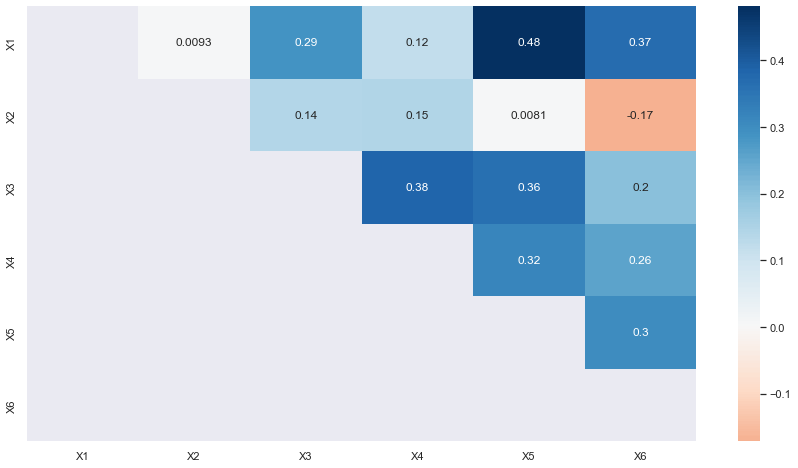

In [284]:
corr_matrix(X_train40)

##### corr_matrix(X_test40)

In [255]:
model_10 = classx_gs2(model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train10,
x_test =  X_test10,
y_train = y_train10,
y_test =  y_test10,
params = {'penalty':['l1'],'C':[0.0001, 0.01,0.1,1]}, # lasso,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 0.1, 'penalty': 'l1'}
score:  0.62
  
test score:  0.6153846153846154
confusion matrix train
[[27 18]
 [20 35]]
 
 
confusion matrix test
[[7 5]
 [5 9]]
 
Test classification_report
 
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.64      0.64      0.64        14

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.62      0.62      0.62        26

 
train roc_auc_score:  0.6858585858585858
 
test_roc_auc_score:  0.6726190476190477
 
Training KS statistic
KstestResult(statistic=0.38585858585858585, pvalue=0.0008221076091055046)
 
Test KS statistic
KstestResult(statistic=0.34523809523809523, pvalue=0.34953456827194895)
 
  features    coef  abs_val
0       X1 0.13713  0.13713
1       X5 0.06942  0.06942
2       X2 0.00000  0.00000
3       X3 0.00000  0.00000
4       X4 0.00000  0.00000
5       X6 0.00000  0.00